# Assignment On Image Stitching

I Putu Krisna Dharma Saputra/2301924353

# Case
Using the images of Taj Mahal as it is shown below, create one panoramic image using image stitching technique. Clearly write the algorithm you followed, implement your respective algorithm in python notebook and show the final combined image. You may need to install imutils python library 

# Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage

# Load Images

In [2]:
a = cv2.imread("images/1a.jpg")
b = cv2.imread("images/1b.jpg")
c = cv2.imread("images/1c.jpg")

# Change the Images to BGR2RGB

In [3]:
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
b = cv2.cvtColor(b, cv2.COLOR_BGR2RGB)
c = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)

# Displaying 3 Images for Input

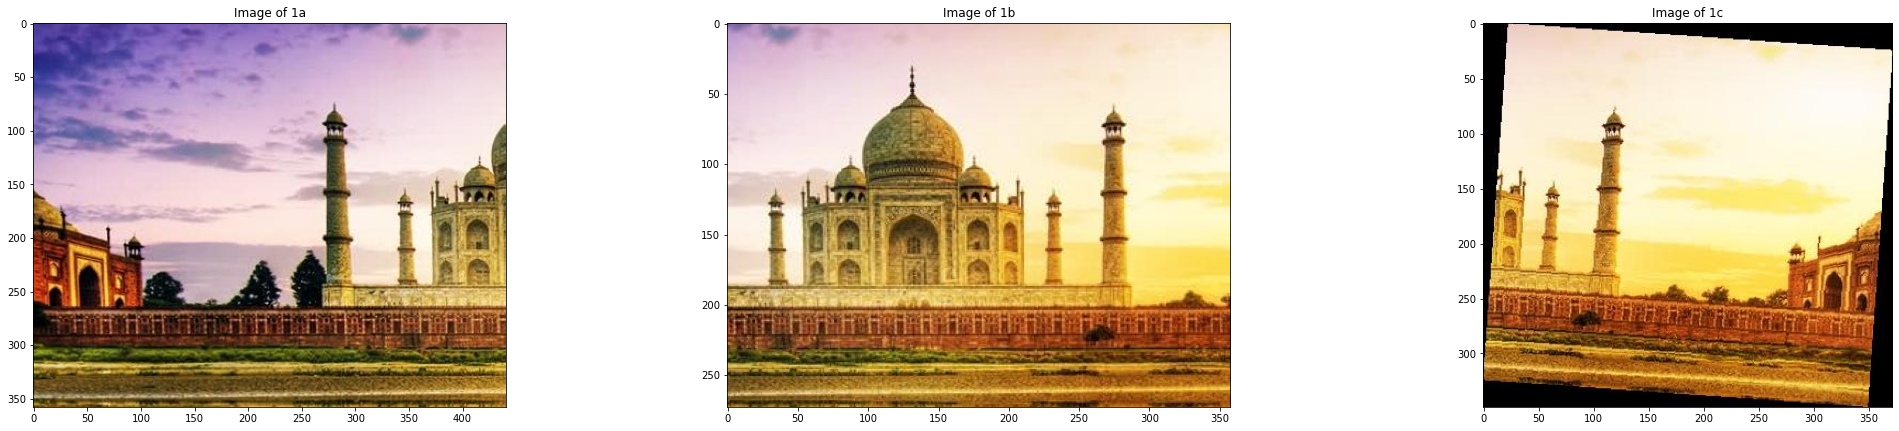

In [4]:
# Making list of the images
list_image = [a, b, c]
list_title = ["Image of 1a", "Image of 1b", "Image of 1c"]

# Image visualization
plt.figure(figsize=(6*6, 4*6))

for i, (image, title) in enumerate(zip(list_image, list_title)):
    plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.title(title)

From the images above, we can see that image 1c have some problem. We need to rotate the images to the center and crop the black borders to fix it.

In [5]:
def cropImage(image, width, height):
    image_size = (image.shape[1], image.shape[0])
    image_center = (int(image_size[0] * 0.5), int(image_size[1] * 0.5))

    if(width > image_size[0]):
        width = image_size[0]

    if(height > image_size[1]):
        height = image_size[1]

    x1 = int(image_center[0] - width * 0.5)
    x2 = int(image_center[0] + width * 0.5)
    y1 = int(image_center[1] - height * 0.5)
    y2 = int(image_center[1] + height * 0.5)

    return image[y1:y2, x1:x2]

In [6]:
height, width, _ = c.shape
angle = 4

# Rotating the Image
c = ndimage.rotate(c, angle)

# Cropping the Image
c = cropImage(c, width-25, height-25)

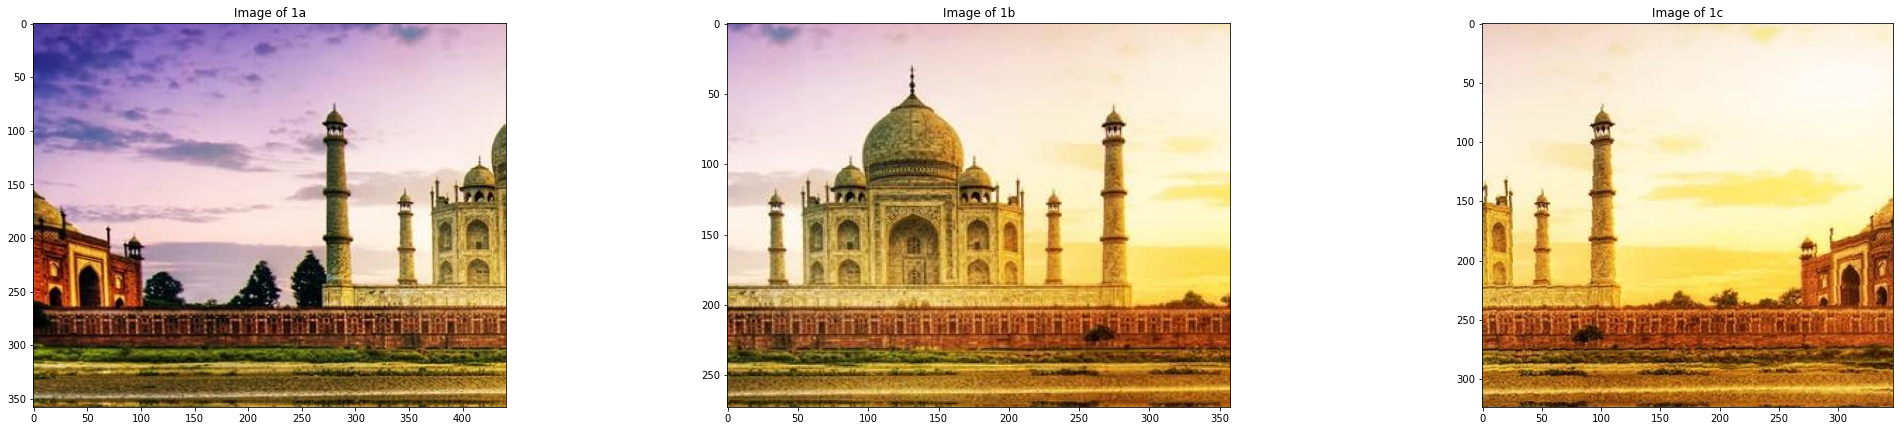

In [7]:
# Making list of the images
list_image = [a, b, c]
list_title = ["Image of 1a", "Image of 1b", "Image of 1c"]

# Image visualization
plt.figure(figsize=(6*6, 4*6))

for i, (image, title) in enumerate(zip(list_image, list_title)):
    plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.title(title)

Now we can see that all the images are ready to be stitched.

# Stitching the Images

After that we ready to stitch a,b,c images using stitcher in cv2

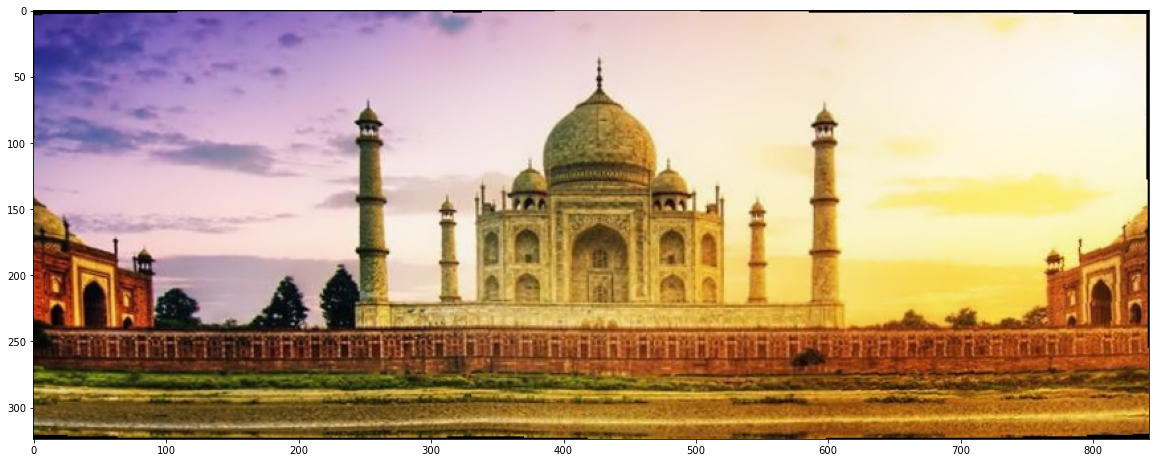

In [8]:
stitcher = cv2.Stitcher_create()
_, result = stitcher.stitch([a, b, c])

plt.figure(1, (20, 20))
plt.imshow(result)
plt.show()